# <font color=#CA1F7B>**Pengaruh Aktivitas dan Subscription Aplikasi terhadap Pengeluaran Mahasiswa**</font>

### <font color=tosca>**Group 2 Class C:**</font>

- Livia Novita Gianto 23102010003
- Felix Budhi Santoso 23102010028
- Nathania Gunawan 23102010070
- Alina Florencia Karuniawati 23102010073
- Andrea Nathania 23102010092

### <font color=tosca>**Latar Belakang Pemilihan Topik:**</font>

Pandemi Covid-19 telah membuat mahasiswa menjadi lebih fleksibel dalam hal waktu dan konsumtif dalam berbelanja. Terbukti dengan sering ditemuinya mahasiswa yang dapat mengikuti kegiatan perkuliahan, meskipun sedang bepergian, seperti ke luar kota, cafe, mall, taman bermain, dan lain sebagainya. Lebih lanjut, selama pandemi juga dikatakan bahwa berbelanja dapat dilakukan dengan lebih mudah menggunakan berbagai platform online. Berdasarkan survei yang dilaksanakan oleh BPS dijelaskan bahwa terjadi peningkatan sebesar 42% dalam aktivitas berbelanja online yang dilakukan oleh generasi milenial selama pandemi. Selain kedua hal tersebut, pandemi Covid-19 juga menyebabkan peningkatan jumlah permintaan terhadap subscription sejumlah aplikasi, seperti netflix, spotify, disney+, chegg, dan lain sebagainya. Sebagai contoh, aplikasi chegg menjadi semakin populer di kalangan mahasiswa ketika pandemi karena aplikasi ini dapat membantu mahasiswa untuk belajar secara online. Lebih lanjut, aplikasi lain yang mengalami peningkatan pesat terkait dengan jumlah pelanggan di tengah pandemi adalah Netflix dengan pertambahan pelanggan mencapai 37 juta pada tahun 2020. Berdasarkan fakta-fakta tersebut, kami tertarik untuk menganalisis lebih lanjut seberapa berpengaruhnya belanja online, bepergian, dan subscription aplikasi terhadap pengeluaran mahasiswa.

### <font color=tosca>**Rumusan masalah:**</font>

- Bagaimana pengaruh aktivitas berbelanja online, bepergian, dan subscription aplikasi terhadap pengeluaran mahasiswa dalam 1 bulan?

### <font color=tosca>**Batasan masalah:**</font>

- Penelitian ini hanya ditujukan kepada seluruh anak muda yang berstatus mahasiswa di Indonesia yang memiliki rentang umur 17 tahun hingga 22 tahun.

### <font color=#683257>**Import Package**</font>

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from statsmodels.stats.diagnostic import normal_ad

### <font color=#683257> Overview Data

In [2]:
df = pd.read_excel('Survei Pengeluaran Mahasiswa (Jawaban).xlsx')
df

,Timestamp,Asal Universitas,Jenis Kelamin,Usia,Berapa rata-rata jumlah pengeluaran anda dalam satu bulan? (Isi dengan angka misal: 300000),"Berapa kali Anda berbelanja online dalam 1 bulan? (isi dengan angka, misal: 2)","Frekuensi bepergian ke luar rumah dalam 1 bulan (isi dengan angka, misal: 2)","Berapa banyak subscription aplikasi (netflix, chegg, course hero, disney+, viu, dsb) yang anda miliki dalam 1 bulan? (isi dalam satuan banyaknya aplikasi, misal: 2)"
0,2022-03-31 17:37:42.149,Universitas Prasetiya Mulya,Female,19.0,2000000.0,2.0,8.0,3.0
1,2022-03-31 17:43:32.768,Universitas Prasetiya Mulya,Female,20.0,630000.0,1.0,1.0,5.0
2,2022-03-31 17:48:24.389,Universitas Prasetiya Mulya,Female,19.0,300000.0,2.0,3.0,2.0
3,2022-03-31 17:55:31.155,Universitas Prasetiya Mulya,Female,19.0,500000.0,10.0,8.0,1.0
4,2022-03-31 17:58:26.919,Universitas Prasetiya Mulya,Male,21.0,1000000.0,1.0,7.0,2.0
...,...,...,...,...,...,...,...,...
56,2022-04-01 10:56:49.502,Universitas Prasetiya Mulya,Female,19.0,2000000.0,2.0,7.0,0.0
57,2022-04-01 10:57:27.844,Universitas Prasetiya Mulya,Female,19.0,1000000.0,5.0,7.0,1.0
58,2022-04-01 11:01:17.295,Universitas Prasetiya Mulya,Male,19.0,500000.0,1.0,2.0,1.0
59,2022-04-01 11:14:22.648,Eksternal Universitas Prasetiya Mulya,Female,20.0,4500000.0,6.0,15.0,7.0


Data di atas diambil melalui survei yang dilakukan melalui google form yang disebarkan kepada mahasiswa di Indonesia. Pada survei tersebut terdapat 7 pertanyaan dan didapatkan 61 responden. 

#### <font color=#683257>Rename Column

In [3]:
df = df.rename(columns={'Berapa rata-rata jumlah pengeluaran anda dalam satu bulan? (Isi dengan angka misal: 300000)':'Y','Berapa kali Anda berbelanja online dalam 1 bulan? (isi dengan angka, misal: 2)':'X1','Frekuensi bepergian ke luar rumah dalam 1 bulan (isi dengan angka, misal: 2)':'X2','Berapa banyak subscription aplikasi (netflix, chegg, course hero, disney+, viu, dsb) yang anda miliki dalam 1 bulan? (isi dalam satuan banyaknya aplikasi, misal: 2)':'X3'})
df

,Timestamp,Asal Universitas,Jenis Kelamin,Usia,Y,X1,X2,X3
0,2022-03-31 17:37:42.149,Universitas Prasetiya Mulya,Female,19.0,2000000.0,2.0,8.0,3.0
1,2022-03-31 17:43:32.768,Universitas Prasetiya Mulya,Female,20.0,630000.0,1.0,1.0,5.0
2,2022-03-31 17:48:24.389,Universitas Prasetiya Mulya,Female,19.0,300000.0,2.0,3.0,2.0
3,2022-03-31 17:55:31.155,Universitas Prasetiya Mulya,Female,19.0,500000.0,10.0,8.0,1.0
4,2022-03-31 17:58:26.919,Universitas Prasetiya Mulya,Male,21.0,1000000.0,1.0,7.0,2.0
...,...,...,...,...,...,...,...,...
56,2022-04-01 10:56:49.502,Universitas Prasetiya Mulya,Female,19.0,2000000.0,2.0,7.0,0.0
57,2022-04-01 10:57:27.844,Universitas Prasetiya Mulya,Female,19.0,1000000.0,5.0,7.0,1.0
58,2022-04-01 11:01:17.295,Universitas Prasetiya Mulya,Male,19.0,500000.0,1.0,2.0,1.0
59,2022-04-01 11:14:22.648,Eksternal Universitas Prasetiya Mulya,Female,20.0,4500000.0,6.0,15.0,7.0


**Keterangan:**

- Y: Rata-rata Pengeluaran Mahasiswa di Indonesia dalam 1 Bulan (dalam satuan Rupiah)
- X1: Frekuensi belanja online dalam 1 Bulan (dalam satuan kali)
- X2: Frekuensi bepergian ke luar rumah dalam 1 Bulan (dalam satuan kali)
- X3: Jumlah Subscription aplikasi dalam 1 Bulan (dalam satuan banyak)

### <font color=green>Data Cleaning

##### <font color=green>Check Missing Value

In [4]:
df.isnull().sum()

Timestamp           0
Asal Universitas    0
Jenis Kelamin       1
Usia                0
Y                   0
X1                  0
X2                  0
X3                  0
dtype: int64

Berdasarkan pengecekan di atas dapat dilihat bahwa kolom yang memiliki missing value hanya jenis kelamin (1 data). Akan tetapi, kolom ini tidak digunakan untuk analisis, sehingga missing value tidak perlu untuk dibuang.

##### <font color=green>Check Duplicated Data

In [5]:
df.duplicated().sum()

0

Berdasarkan hasil di atas dapat dilihat bahwa tidak ada data yang duplikat

##### <font color=green> Drop Unnecessary Columns

In [6]:
df1 = df[['Y','X1','X2','X3']]
df1

,Y,X1,X2,X3
0,2000000.0,2.0,8.0,3.0
1,630000.0,1.0,1.0,5.0
2,300000.0,2.0,3.0,2.0
3,500000.0,10.0,8.0,1.0
4,1000000.0,1.0,7.0,2.0
...,...,...,...,...
56,2000000.0,2.0,7.0,0.0
57,1000000.0,5.0,7.0,1.0
58,500000.0,1.0,2.0,1.0
59,4500000.0,6.0,15.0,7.0


### <font color=#800000>Basic Statistics

In [7]:
df1.describe()

,Y,X1,X2,X3
count,6.100000e+01,61.000000,61.000000,61.000000
mean,1.676721e+06,3.098361,7.000000,2.147541
std,1.740710e+06,2.706196,5.477226,2.619390
min,1.000000e+05,0.000000,0.000000,0.000000
25%,5.000000e+05,1.000000,3.000000,1.000000
50%,1.000000e+06,2.000000,5.000000,2.000000
75%,2.500000e+06,3.000000,10.000000,2.000000
max,1.050000e+07,15.000000,26.000000,15.000000


Tabel di atas dapat diinterpretasikan sebagai berikut:

- Rata-rata pengeluaran mahasiswa di Indonesia dalam satu bulan adalah sebesar Rp1.676.721,31 dengan standar deviasi sebesar 1740710.31. Sebaran data dari pengeluaran mahasiswa (Y) di Indonesia berada di range mean ± 1 * std, yaitu berada pada rentang -63989 ⩽ Y ⩽ 3417431.62.

In [8]:
df1.skew()

Y     2.475824
X1    2.281702
X2    1.423274
X3    2.738886
dtype: float64

Berdasarkan hasil perhitungan skewness, di atas dapat dilihat bahwa Y, X1, X2, dan X3 tergolong highly skewed karena memiliki nilai skewness lebih besar dari 1. 

### <font color=#E1AD01>Check Outliers

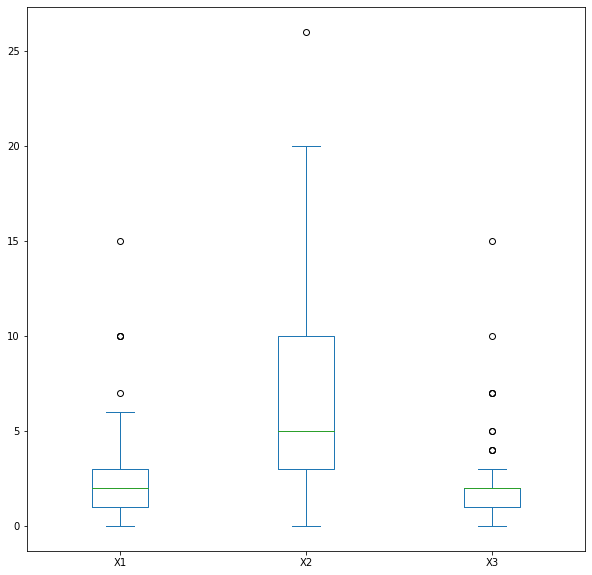

In [9]:
df2 = df1.drop(['Y'],axis=1)
df2.plot(figsize=(10,10), kind='box')
plt.show()

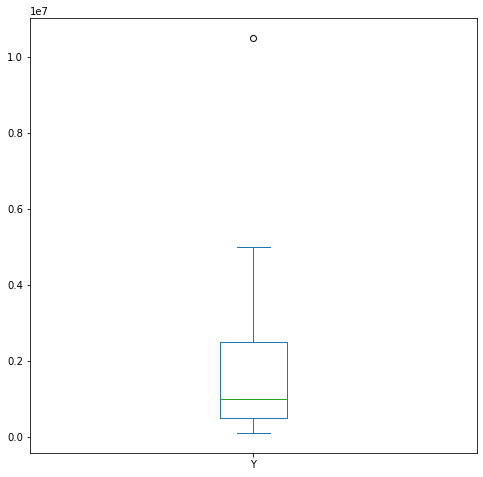

In [10]:
df3 = df1[['Y']]
df3.plot(figsize=(8,8), kind='box')
plt.show()

Berdasarkan kedua visualisasi di atas, dapat dilihat bahwa kolom Y, X1, X2, X3 memiliki outliers. Akan tetapi, kami memutuskan untuk tidak membuang outliers tersebut karena kami telah mengecek apabila outliers tersebut dibuang, akurasi dari pemodelan regresi akan lebih rendah.

### <font color=#663399> Pair Plot Between Variables

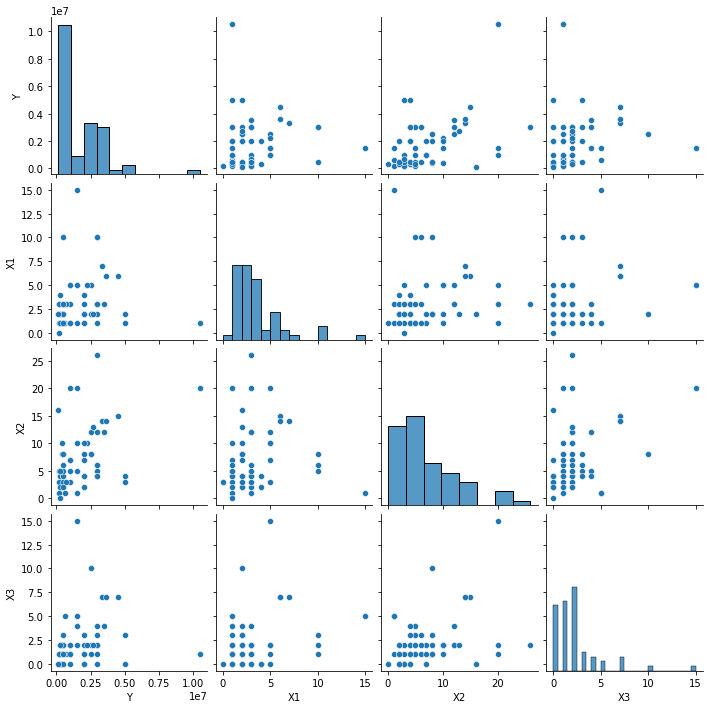

In [11]:
sns.pairplot(data=df1)
plt.show()

### <font color=#456990>Correlation Between Variables

In [12]:
df1.corr()

,Y,X1,X2,X3
Y,1.000000,0.107838,0.456721,0.210543
X1,0.107838,1.000000,0.102322,0.282414
X2,0.456721,0.102322,1.000000,0.392649
X3,0.210543,0.282414,0.392649,1.000000


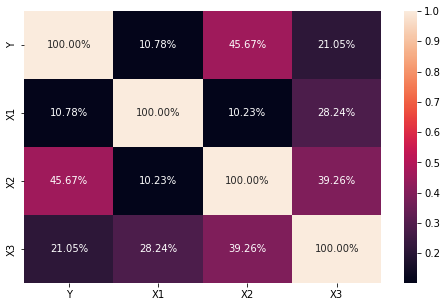

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(df1.corr(), annot=True, fmt='.2%')
plt.show()

Dari Correlation Heat Map di atas, dapat terlihat bahwa terdapat hubungan yang positif antar variabel. Hal ini mengindikasikan bahwa hubungan antara dependent variabel dan independent variabel berbanding lurus. Hubungan antara independent variabel dan dependent variabel yang paling kuat adalah X2 dan Y dimana angka korelasinya sebesar 45.67% (mendekati 50%).

### <font color=magenta>Multicollinearity Test for Independent Variables with VIF

In [14]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    return vif

In [15]:
iv = df1.drop(['Y'],axis=1)
calc_vif(iv)

,Variables,VIF
0,X1,1.894156
1,X2,2.200850
2,X3,2.136649


Multikolinearitas terjadi ketika dua atau lebih variabel independen sangat berkorelasi satu sama lain dalam sebuah model regresi. Artinya suatu variabel bebas dapat diprediksi dari variabel bebas lainnya dalam suatu model regresi. Dalam hal ini, apabila nilai VIF > 5 menandakan bahwa terjadi multikolinearitas antara independent variabel, sehingga independent variable yang memiliki nilai VIF > 5 harus dibuang. Akan tetapi pada data di atas, dapat dilihat bahwa nilai VIF dari X1, X2, dan X3 tidak lebih dari 5, sehingga menandakan bahwa tidak terjadi multikolinearitas

## <font color=#FF7913> Multiple Linear Regression

### <font color=#6C88C4> Create and Fit Model

In [16]:
LR = LinearRegression()
X = df1[['X1','X2','X3']]
y = df1[['Y']]
model = LR.fit(X, y)  #create model dari LR dari X dan y (berdasarkan data yang dimiliki)

#### <font color=#6C88C4> Estimate B0, B1, B2, B3

In [17]:
print('intercept:', model.intercept_[0])

intercept: 549148.0612696146


In [18]:
print('slope:', model.coef_[0][0],',',model.coef_[0][1],',',model.coef_[0][2])

slope: 36467.01857599965 , 140727.72022087636 , 13732.558911262446


*Linear Regression Equation:*

𝑦̂ = B0 + B1X1 + B2X2 + B3X3

**𝑦̂ = 549148.0612696146 + 36467.01857599965X1 + 140727.72022087636X2 + 13732.558911262446X3**

#### <font color=#6C88C4>Coefficient of Determination

In [19]:
Rsquared = model.score(X,y)
Rsquared

0.21270351392530795

Berdasarkan hasil di atas, dapat dikatakan bahwa 21.27% pengeluaran mahasiswa di Indonesia per bulan dapat direpresentasikan oleh frekuensi belanja online, frekuensi bepergian ke luar rumah, dan jumlah subscription aplikasi dalam 1 bulan. Nilai dari coefficient of determination di atas dapat dikatakan rendah. Hal ini disebabkan karena rata-rata pengeluaran mahasiswa di Indonesia dalam 1 bulan dipengaruhi oleh banyak hal tidak hanya dari frekuensi belanja online, frekuensi bepergian, dan jumlah subscription aplikasi. Dengan kata lain, rata-rata pengeluaran mahasiswa di Indonesia dalam 1 bulan tidak dapat dikontrol oleh satu hingga tiga variable saja.

### <font color=#6C88C4> Predict Response

In [20]:
H = model.predict(X)
df1['Estimated Expenditure'] = H   #[] - Di data frame, memilih kolom atau menambah
df1

,Y,X1,X2,X3,Estimated Expenditure
0,2000000.0,2.0,8.0,3.0,1.789102e+06
1,630000.0,1.0,1.0,5.0,7.950056e+05
2,300000.0,2.0,3.0,2.0,1.071730e+06
3,500000.0,10.0,8.0,1.0,2.053373e+06
4,1000000.0,1.0,7.0,2.0,1.598174e+06
...,...,...,...,...,...
56,2000000.0,2.0,7.0,0.0,1.607176e+06
57,1000000.0,5.0,7.0,1.0,1.730310e+06
58,500000.0,1.0,2.0,1.0,8.808031e+05
59,4500000.0,6.0,15.0,7.0,2.974994e+06


### <font color=#6C88C4> Calculate Residual

In [21]:
df1['Residual'] = df1['Y'] - df1['Estimated Expenditure'] #residual = actual - estimated ---> u = y - yhead
df1

,Y,X1,X2,X3,Estimated Expenditure,Residual
0,2000000.0,2.0,8.0,3.0,1.789102e+06,2.108985e+05
1,630000.0,1.0,1.0,5.0,7.950056e+05,-1.650056e+05
2,300000.0,2.0,3.0,2.0,1.071730e+06,-7.717304e+05
3,500000.0,10.0,8.0,1.0,2.053373e+06,-1.553373e+06
4,1000000.0,1.0,7.0,2.0,1.598174e+06,-5.981742e+05
...,...,...,...,...,...,...
56,2000000.0,2.0,7.0,0.0,1.607176e+06,3.928239e+05
57,1000000.0,5.0,7.0,1.0,1.730310e+06,-7.303098e+05
58,500000.0,1.0,2.0,1.0,8.808031e+05,-3.808031e+05
59,4500000.0,6.0,15.0,7.0,2.974994e+06,1.525006e+06


In [22]:
df1['Residual'].sum()

-1.3504177331924438e-08

Seharusnya jumlah residual yang baik mendekati 0. Perhitungan di atas menunjukkan residual yang baik karena mendekati 0

### <font color=#6C88C4> Residual Squared

In [23]:
df1['Residual Squared']= df1['Residual']**2
df1 

,Y,X1,X2,X3,Estimated Expenditure,Residual,Residual Squared
0,2000000.0,2.0,8.0,3.0,1.789102e+06,2.108985e+05,4.447816e+10
1,630000.0,1.0,1.0,5.0,7.950056e+05,-1.650056e+05,2.722685e+10
2,300000.0,2.0,3.0,2.0,1.071730e+06,-7.717304e+05,5.955678e+11
3,500000.0,10.0,8.0,1.0,2.053373e+06,-1.553373e+06,2.412966e+12
4,1000000.0,1.0,7.0,2.0,1.598174e+06,-5.981742e+05,3.578124e+11
...,...,...,...,...,...,...,...
56,2000000.0,2.0,7.0,0.0,1.607176e+06,3.928239e+05,1.543106e+11
57,1000000.0,5.0,7.0,1.0,1.730310e+06,-7.303098e+05,5.333523e+11
58,500000.0,1.0,2.0,1.0,8.808031e+05,-3.808031e+05,1.450110e+11
59,4500000.0,6.0,15.0,7.0,2.974994e+06,1.525006e+06,2.325644e+12


### <font color=#6C88C4> Linear Regression with Statsmodels

In [24]:
X = sm.add_constant(df1[['X1','X2','X3']].to_numpy())
y = df1['Y'].to_numpy()
LR = sm.OLS(y, X)
model = LR.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     5.133
Date:                Fri, 01 Apr 2022   Prob (F-statistic):            0.00327
Time:                        22:41:05   Log-Likelihood:                -955.32
No. Observations:                  61   AIC:                             1919.
Df Residuals:                      57   BIC:                             1927.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.491e+05   3.92e+05      1.403      0.1

Dari summary pemodelan di atas dapat ditarik kesimpulan sebagai berikut:

- F Test dengan alpha 5%, H0: B1 = B2 = B3 = 0, H1 :One or more slope terms is non zero. Dari summary di atas didapatkan nilai Prob (F-statistic) sebesar 0.00327 yang menandakan bahwa Prob(Fstat) < p-value, sehingga H0 ditolak dan dapat disimpulkan bahwa one or more slope terms is non zero
- Dari X1, X2, dan X3, variabel yang paling signifikan terhadap nilai Y (rata-rata pengeluaran mahasiswa di Indonesia dalam 1 bulan) adalah variabel independen yang memiliki p-value < 0.05 dimana variabel tersebut adalah X2 atau frekuensi bepergian ke luar rumah (0.001 < 0.05)
- Test statistik durbin watson digunakan untuk mendeteksi autocorrelation pada residual dalam analisis regresi. Dari summary di atas dapat dilihat bahwa nilai dari Durbin Watson sebesar 2.146 menandakan bahwa tidak ada autokorelasi pada residual dengan toleransi interval nilai DW 1,5 - 2,5 (rule of thumb).
- Jarque-Bera test dengan alpha 5%, H0: distribusi dari residual adalah distribusi normal, H1: distribusi dari residual bukan distribusi normal. Dari hasil di atas dapat dilihat bahwa Prob(JB) < 0.05, sehingga H0 ditolak dan distribusi residual adalah distribusi normal

## <font color=chocolate> Uji Asumsi Klasik

Kita akan memvalidasi model kita dengan melakukan analisis residual, berikut merupakan asumsi yang akan kami lakukan untuk mengecek validitas model:
- Normality test (Anderson-Darling Test)
- Linearity Test
- Heteroskedacity Test

### <font color=#C05780>Normality test for Residuals use Anderson-Darling Test

The Anderson-Darling Test will determine if a data set comes from a specified distribution, in our case, the normal distribution.

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 1.2143581784638156e-05


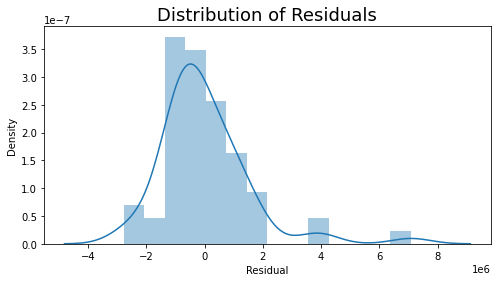

Residuals are not normally distributed


In [25]:
# Performing the test on the residuals
p_value = normal_ad(df1['Residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df1['Residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

### <font color=#FF5851>Linearity test

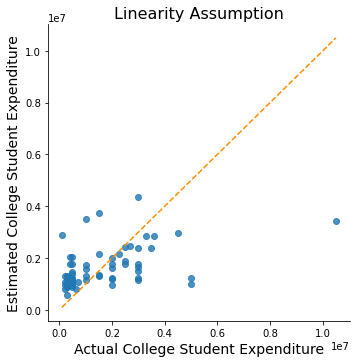

In [26]:
sns.lmplot(x='Y', y='Estimated Expenditure', data=df1, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df1[['Y', 'Estimated Expenditure']].min().min()-10, 
                        df1[['Y','Estimated Expenditure']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Estimated College Student Expenditure', fontsize=14)
plt.xlabel('Actual College Student Expenditure', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

Plot di atas menunjukkan titik sisa yang tersebar tidak merata di sekitar garis diagonal, sehingga kita tidak dapat mengasumsikan bahwa ada hubungan linier antara variabel independen dan dependen.

### <font color=#00B0BA>Heteroscedasticity test

Heteroscedasticity is a condition where the error variance is not constant on the independent variable. 

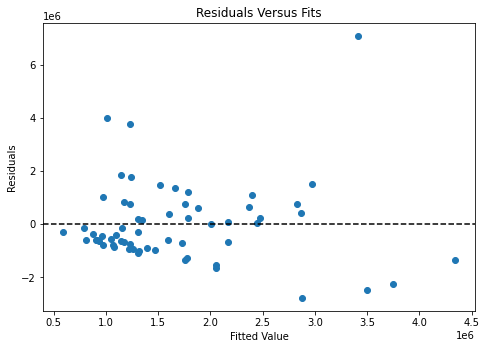

In [27]:
fitted = 549148.0612696146 + (36467.01857599965 * df1.X1) + (140727.72022087636 * df1.X2) + (13732.558911262446 * df1.X3) 
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, df1["Y"]  - fitted, marker = "o")
plt.show()

From the visualization above we can conclude that the residuals are not distributed with equal variance or in other words heteroscedasticity is present

## <font color=#305F72>Conclusion

Dari uji asumsi klasik yang telah dilakukan dapat dilihat bawa:
- Distribusi dari residual tidak berdistribusi normal
- Terdapat heteroscedasticity
- Tidak terdapat hubungan linear antara dependen variabel dan independen variabel
- Tidak terdapat hubungan multikolinear antarvariabel independen

Berdasarkan hasil di atas dapat dikatakan bahwa pemodelan ini hanya memenuhi asumsi multikolinearitas. Oleh karena itu, pemodelan ini dianggap memiliki performa yang kurang baik untuk memprediksi rata-rata pengeluaran mahasiswa di Indonesia dalam 1 bulan dengan menggunakan tiga variabel independen (frekuensi belanja online, frekuensi bepergian ke luar rumah, dan jumlah subscription aplikasi). Artinya, terdapat faktor-faktor lain yang lebih memengaruhi rata-rata pengeluaran mahasiswa di Indonesia dalam 1 bulan secara signifikan

## <font color=#8B7F6A> Simple Linear Regression

##### <font color=#B30019>Provide Data

In [28]:
df4 = df1[['X2','Y']]
df4

,X2,Y
0,8.0,2000000.0
1,1.0,630000.0
2,3.0,300000.0
3,8.0,500000.0
4,7.0,1000000.0
...,...,...
56,7.0,2000000.0
57,7.0,1000000.0
58,2.0,500000.0
59,15.0,4500000.0


**Keterangan:**

- X2 : Frekuensi bepergian ke luar rumah dalam 1 bulan (dalam satuan kali)
- Y  : Rata-rata Pengeluaran mahasiswa di Indonesia dalam 1 bulan (dalam satuan rupiah)

##### <font color=#B30019> Correlation between variables

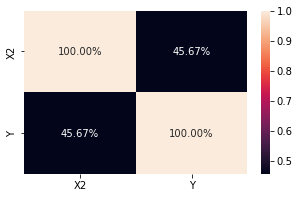

In [29]:
fig, ax = plt.subplots(figsize=(5,3))
sns.heatmap(df4.corr(), annot=True, fmt='.2%')
plt.show()

Kita memilih untuk menganalisis hubungan antara variabel Y (dependent variable) dan X2 (independent variable) karena jika dibandingkan dari hubungan Y dengan independent variables lainnya (X1 dan X3), korelasi antara Y dan X2 merupakan yang paling kuat.

**Keterangan:**

- X2 : Frekuensi bepergian ke luar rumah (dalam satuan kali)
- Y  : Rata-rata Pengeluaran mahasiswa di Indonesia dalam 1 bulan (dalam satuan rupiah)
- X1 : Frekeunsi belanja online dalam 1 bulan (dalam satauan kali)
- X3 : Jumlah Subscription Aplikasi dalam 1 bulan (dalam satuan banyak)

##### <font color=#B30019>Data Visualization

*Scatterplot of College Student Expenditures vs Going Out Frequencies*

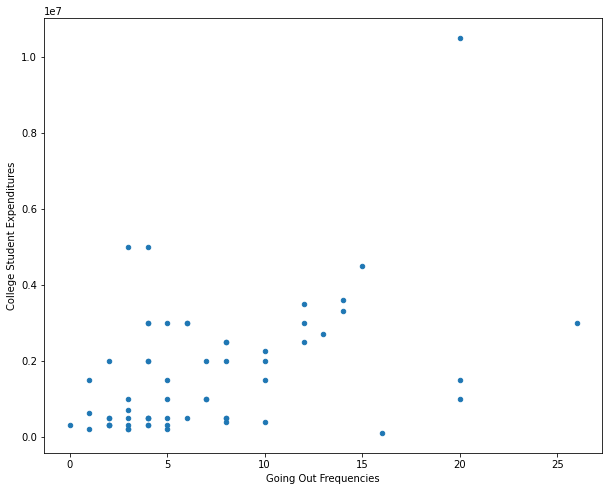

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))  #menunjukkan ukuran dari plot
df4.plot(x="X2",y="Y",ax=ax,kind="scatter")
plt.xlabel("Going Out Frequencies")
plt.ylabel("College Student Expenditures")
plt.show()

##### <font color=#B30019> Create and Fit Model

In [31]:
LR1 = LinearRegression()
x = df4[['X2']]
Y = df4[['Y']]
model1 = LR1.fit(x, Y)  #create model1 dari LR1 dari x dan Y (berdasarkan data yang dimiliki)

In [32]:
r_sq = model1.score(x, Y)
print('Coefficient of determination (R^2):', r_sq)  #mengeluarkan hasil perhitungannya dengan template
print('intercept:', model1.intercept_[0])
print('slope:', model1.coef_[0][0])

Coefficient of determination (R^2): 0.20859424814011474
intercept: 660671.3114754097
slope: 145150.00000000003


In [33]:
print('X max:', x['X2'].max())
print('X min:', x['X2'].min())

X max: 26.0
X min: 0.0


𝑦̂ = B0 + B1X2

**𝑦̂ = 660671.3114754097 + 145150X2**

1. Interpretation of slope: **One unit increment in Going Out Frequencies will increase the College Student Expenditures by Rp145.150**
2. Interpretation of intercept: **The starting College Student Expenditures when Going out Frequencies is 0 is 660671.31**
3. Interpretation of coefficient of determination: **The result of coefficient determination shows that 20.86% of the total variation in college student expenditures is explained by Going Out Frequencies. This figure is not high enough, but this model still valid as college student expenditures isn't only influenced by going out frequencies.**
4. This linear model just valid for X(Going out frequencies) between 0 and 26

##### <font color=#B30019>Predict Response

In [34]:
H1 = model1.predict(x)
df4['Estimated Expenditure'] = H1
df4

,X2,Y,Estimated Expenditure
0,8.0,2000000.0,1.821871e+06
1,1.0,630000.0,8.058213e+05
2,3.0,300000.0,1.096121e+06
3,8.0,500000.0,1.821871e+06
4,7.0,1000000.0,1.676721e+06
...,...,...,...
56,7.0,2000000.0,1.676721e+06
57,7.0,1000000.0,1.676721e+06
58,2.0,500000.0,9.509713e+05
59,15.0,4500000.0,2.837921e+06


##### <font color=#B30019> Calculate Residual

In [35]:
df4['Residual'] = df4['Y'] - df4['Estimated Expenditure'] #residual = actual - estimated ---> u = y - yhead
df4

,X2,Y,Estimated Expenditure,Residual
0,8.0,2000000.0,1.821871e+06,1.781287e+05
1,1.0,630000.0,8.058213e+05,-1.758213e+05
2,3.0,300000.0,1.096121e+06,-7.961213e+05
3,8.0,500000.0,1.821871e+06,-1.321871e+06
4,7.0,1000000.0,1.676721e+06,-6.767213e+05
...,...,...,...,...
56,7.0,2000000.0,1.676721e+06,3.232787e+05
57,7.0,1000000.0,1.676721e+06,-6.767213e+05
58,2.0,500000.0,9.509713e+05,-4.509713e+05
59,15.0,4500000.0,2.837921e+06,1.662079e+06


In [36]:
df4['Residual'].sum()

0.0

Seharusnya jumlah residual yang baik mendekati 0. Perhitungan di atas menunjukkan residual yang baik karena mendekati 0

##### <font color=#B30019>Visualization of Linear Regression Model

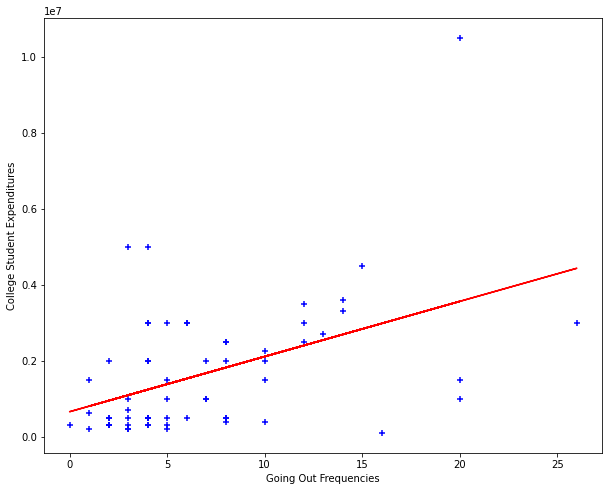

In [37]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.scatter(df4['X2'],df4['Y'], color="blue", marker="+")
plt.plot(x,LR1.predict(x), color="red")
plt.ylabel('College Student Expenditures')
plt.xlabel('Going Out Frequencies')
plt.show()

Dari visualisasi di atas dapat dilihat bahwa antara pengeluaran mahasiswa di Indonesia dengan frekuensi bepergian ke luar rumah memiliki korelasi yang positif. Lebih lanjut, juga dapat dilihat bahwa masih banyak perkiraan yang menyimpang dari data sebenarnya. Hal ini mengingat nilai dari koefisien determinasi yang rendah, yaitu sebesar 20.86%.

##### <font color=#B30019>Linear Regression with Statsmodels

In [38]:
x = sm.add_constant(df4['X2'].to_numpy())
Y = df4['Y'].to_numpy()
LR1 = sm.OLS(Y, x)
model1 = LR1.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     15.55
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           0.000216
Time:                        22:41:08   Log-Likelihood:                -955.47
No. Observations:                  61   AIC:                             1915.
Df Residuals:                      59   BIC:                             1919.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.607e+05   3.26e+05      2.026      0.0

From the summary of the model above, we can draw the following conclusions:
1. The value of skewness (1.814) indicates that the data are highly skewed.
2. The value of kurtosis (8.718) indicates that the data has heavier tails than a normal distribution as the value of kurtosis is greater than 3.
3. Jarque-Bera test dengan alpha 5%, H0: distribusi dari residual adalah distribusi normal, H1: distribusi dari residual bukan distribusi normal. Dari hasil di atas dapat dilihat bahwa Probabilitas dari Jarque-Bera lebih kecil daripada alpha (0.05), sehingga H0 ditolak dan dapat disimpulkan bahwa distribusi residual tidak normal.
4. Test statistik durbin watson digunakan untuk mendeteksi autocorrelation pada residual dalam analisis regresi. Dari summary di atas dapat dilihat bahwa nilai dari Durbin Watson sebesar 2.164 menandakan bahwa tidak ada autokorelasi pada residual dengan toleransi interval nilai DW 1,5 - 2,5 (rule of thumb).
5. F Test dengan alpha 5%, H0: B1 = 0, H1 :B1 ≠ 0. Dari summary di atas didapatkan nilai Prob (F-statistic) sebesar 0.000216 yang menandakan bahwa Prob(Fstat) < p-value, sehingga H0 ditolak dan dapat disimpulkan bahwa B1 ≠ 0

### <font color=#C05780>Normality test for Residuals use Anderson-Darling Test

p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 2.8858714336164538e-05


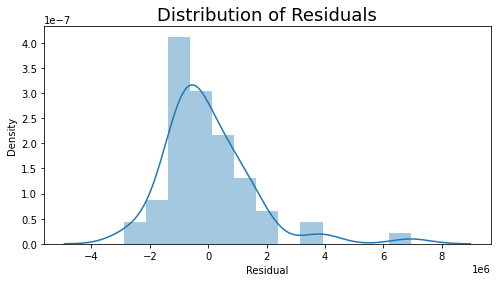

Residuals are not normally distributed


In [39]:
# Performing the test on the residuals
p_value = normal_ad(df4['Residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sns.distplot(df4['Residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

### <font color=#FF5851>Linearity test

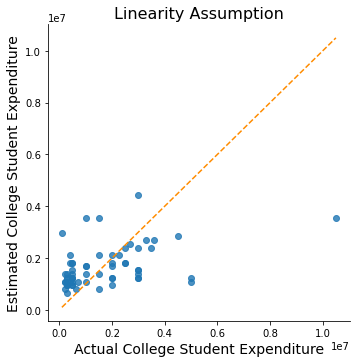

In [40]:
sns.lmplot(x='Y', y='Estimated Expenditure', data=df4, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df4[['Y', 'Estimated Expenditure']].min().min()-10, 
                        df4[['Y','Estimated Expenditure']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Estimated College Student Expenditure', fontsize=14)
plt.xlabel('Actual College Student Expenditure', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

Plot sebar menunjukkan titik sisa yang tersebar tidak merata di sekitar garis diagonal, sehingga kita tidak dapat mengasumsikan bahwa ada hubungan linier antara variabel independen dan dependen.

### <font color=#00B0BA>Heteroscedasticity test

Heteroscedasticity is a condition where the error variance is not constant on the independent variable. 

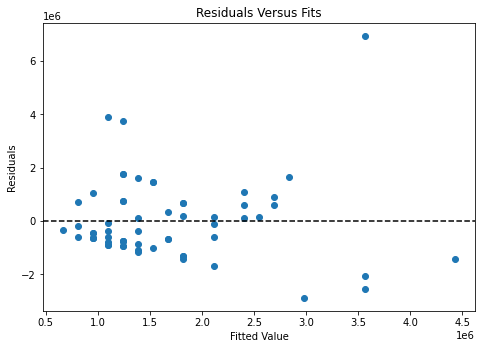

In [41]:
fitted = 660671.3114754097 + (145150.00000000003 * df4.X2) 
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.0, 1.0]) 
axes.axhline(color="black", ls="--") # This creates a horizon line (like abline in R)
axes.set_xlabel('Fitted Value')
axes.set_ylabel('Residuals')
axes.set_title('Residuals Versus Fits')
axes.scatter(fitted, df4["Y"]  - fitted, marker = "o")
plt.show()

From the visualization above we can conclude that the residuals are not distributed with equal variance or in other words heteroscedasticity is present

## <font color=#305F72>Conclusion

Dari uji asumsi klasik yang telah dilakukan dapat dilihat bawa:
- Distribusi dari residual tidak berdistribusi normal
- Terdapat heteroscedasticity
- Tidak terdapat hubungan linear antara dependen variabel dan independen variabel

Berdasarkan hasil di atas dapat pemodelan ini tidak memenuhi uji asumsi klasik. Oleh karena itu, pemodelan ini dianggap memiliki performa yang kurang baik untuk memprediksi rata-rata pengeluaran mahasiswa di Indonesia dalam 1 bulan dengan menggunakan satu variabel independen (frekuensi bepergian ke luar rumah). Artinya, terdapat faktor-faktor lain yang lebih memengaruhi rata-rata pengeluaran mahasiswa di Indonesia dalam 1 bulan secara signifikan.